In [2]:
## 1. Import Libraries & Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Sample SMS spam dataset (small synthetic)

In [5]:
data = {
    'text': [
        'Congratulations! you won a free lottery ticket',
        'Hey, are we still meeting today?',
        'Free entry in 2 a weekly contest win prizes',
        'Call now to claim your free vacation',
        'Can you send me the assignment?',
        'Win a brand new car by clicking here',
        'Are you coming to the party?',
        'Exclusive offer only for you click now',
        'Lets finish the project tomorrow',
        'FREE money claim now click!'
    ],
    'label': ['spam','ham','spam','spam','ham','spam','ham','spam','ham','spam']
}

In [6]:
df = pd.DataFrame(data)
df.head()

,text,label
0,Congratulations! you won a free lottery ticket,spam
1,"Hey, are we still meeting today?",ham
2,Free entry in 2 a weekly contest win prizes,spam
3,Call now to claim your free vacation,spam
4,Can you send me the assignment?,ham


In [7]:
## 2. Preprocessing & Vectorization

In [8]:
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [9]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
## 3. Train Naive Bayes Classifier

In [11]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

In [12]:
## 4. Evaluation

In [13]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label='spam')
rec = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

In [14]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.33
Precision: 0.33
Recall: 1.00
F1 Score: 0.50


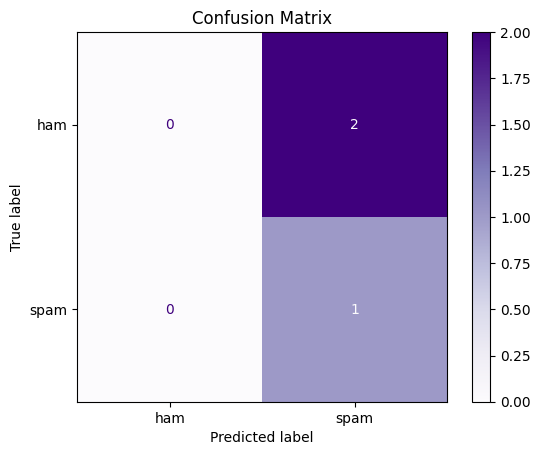

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=['ham','spam'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham','spam'])
disp.plot(cmap='Purples')
plt.title('Confusion Matrix')
plt.show()

In [16]:
## 5. Try Custom Input

In [17]:
sample = ["Congratulations you won a free iPhone"]
sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec)[0])

Prediction: spam
